# Lab 1

## Brakujące wartości

Pracę ze zbiorem danych rozpoczynamy od jego wczytania. Nadajemy kolumnom odpowiednie nazwy.

In [1]:
import pandas as pd
import numpy as np

data_set=pd.read_csv("./data/crx.data", names=["A"+str(i) for i in range(1,17)])

print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


Zobaczmy kilka początkowych wierszy, korzystając z metody `head()` 


In [2]:
data_set.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


W analizowanym zbiorze danych brak wartości jest reprezentowany, przy pomocy **?**. Konieczne jest więc zastąpienie tych wartości, przy pomocy pustej wartości (najlepiej `np.nan`).

In [6]:
data_set.replace('?', np.nan, inplace=True)


In [7]:
data_set.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

Jak widzimy, niewiele jest brakujących wartości. Spójrzmy jeszcze, jak wygląda rozkład brakujących wartości na poniższym wykresie.

<AxesSubplot:>

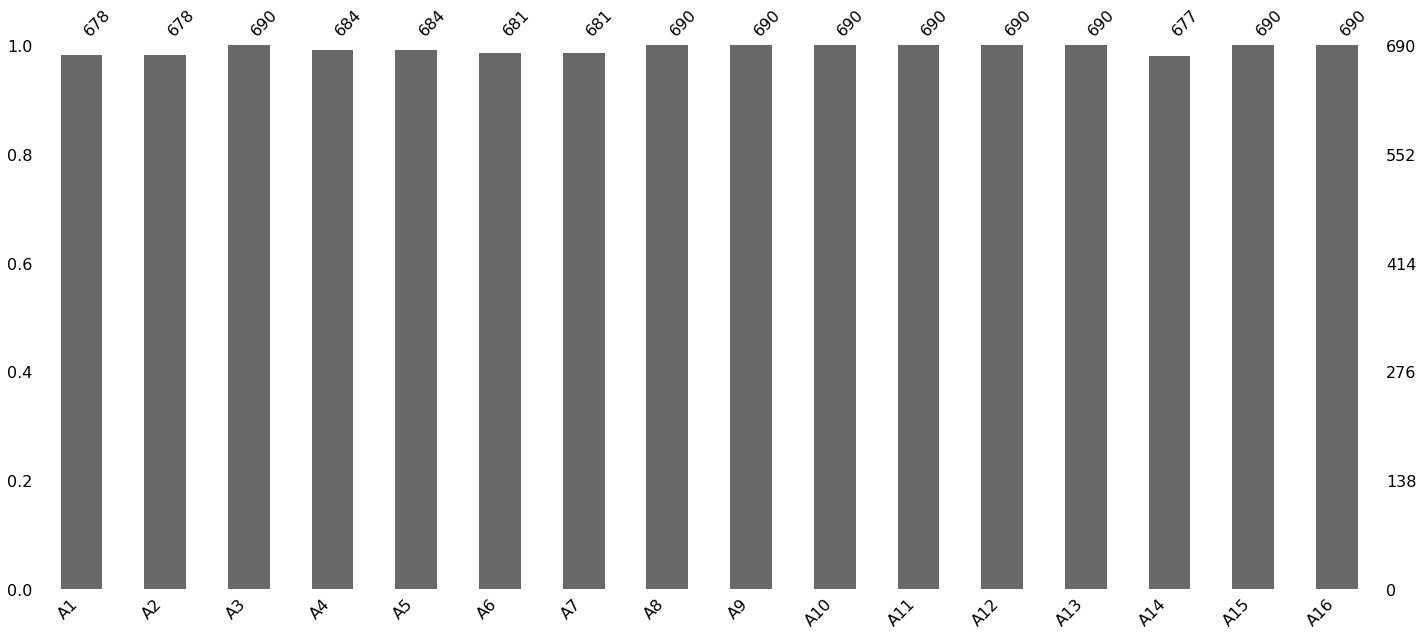

In [8]:
import missingno as mso
mso.bar(data_set)

Możemy zauważyć, że brakujące wartości są ze sobą powiązane (np. kolumny A1, A2 oraz A14). 

In [ ]:
data = data_set.copy(deep=True)
data.dropna(axis="rows",subset=['A1', 'A4','A5','A6','A7'],inplace=True)
data['A2'] = data['A2'].astype(float)
data['A14'] = data['A14'].astype(float)
data['A2'].fillna(data['A2'].mean(),inplace=True)
data['A14'].fillna(data['A14'].mean(),inplace=True)
data.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [ ]:
data.shape

(671, 16)

Po usunięciu wierwszy zawierające brakujące dane kategoryczne (kolumny 'A1', 'A4','A5','A6','A7') oraz zastąpienie brakujących wartości średnią w kolumnach numerycznych (kolumny 'A2', 'A14') utraciliśmy tylko 19 wierwszy.

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.213273,0.411955,0.196378,-0.082528,0.020742
A3,0.213273,1.000000,0.291674,0.266506,-0.223198,0.121718
A8,0.411955,0.291674,1.000000,0.318445,-0.072692,0.049433
A11,0.196378,0.266506,0.318445,1.000000,-0.118204,0.061738
A14,-0.082528,-0.223198,-0.072692,-0.118204,1.000000,0.069275
A15,0.020742,0.121718,0.049433,0.061738,0.069275,1.000000


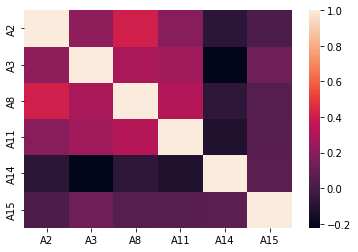

In [ ]:
from seaborn import heatmap
heatmap(data.corr())
data.corr()

array([[<AxesSubplot:xlabel='A2', ylabel='A2'>,
        <AxesSubplot:xlabel='A3', ylabel='A2'>,
        <AxesSubplot:xlabel='A8', ylabel='A2'>,
        <AxesSubplot:xlabel='A11', ylabel='A2'>,
        <AxesSubplot:xlabel='A14', ylabel='A2'>,
        <AxesSubplot:xlabel='A15', ylabel='A2'>],
       [<AxesSubplot:xlabel='A2', ylabel='A3'>,
        <AxesSubplot:xlabel='A3', ylabel='A3'>,
        <AxesSubplot:xlabel='A8', ylabel='A3'>,
        <AxesSubplot:xlabel='A11', ylabel='A3'>,
        <AxesSubplot:xlabel='A14', ylabel='A3'>,
        <AxesSubplot:xlabel='A15', ylabel='A3'>],
       [<AxesSubplot:xlabel='A2', ylabel='A8'>,
        <AxesSubplot:xlabel='A3', ylabel='A8'>,
        <AxesSubplot:xlabel='A8', ylabel='A8'>,
        <AxesSubplot:xlabel='A11', ylabel='A8'>,
        <AxesSubplot:xlabel='A14', ylabel='A8'>,
        <AxesSubplot:xlabel='A15', ylabel='A8'>],
       [<AxesSubplot:xlabel='A2', ylabel='A11'>,
        <AxesSubplot:xlabel='A3', ylabel='A11'>,
        <AxesSubplot:xlabe

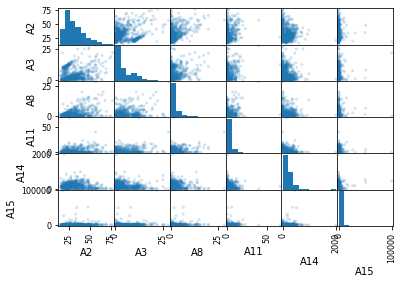

In [ ]:
pd.plotting.scatter_matrix(data, alpha=0.2)

In [ ]:
from pandas import get_dummies

data=get_dummies(data=data,columns=["A1","A4","A5","A6","A7","A9","A10","A12","A13"])
data.head()

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,+,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,+,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,+,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,+,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,+,0,1,0,...,0,0,1,1,0,1,0,0,0,1


In [ ]:
data.shape

(671, 47)

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
A2,1.000000,0.213273,0.411955,0.196378,-0.082528,0.020742,-0.040592,0.040592,-0.063935,0.107069,...,0.249749,-0.214269,0.214269,-0.102061,0.102061,-0.058419,0.058419,0.022681,-0.027499,-0.017587
A3,0.213273,1.000000,0.291674,0.266506,-0.223198,0.121718,0.038945,-0.038945,0.069552,0.077260,...,0.203729,-0.228049,0.228049,-0.162223,0.162223,0.016842,-0.016842,0.102870,0.079345,-0.120321
A8,0.411955,0.291674,1.000000,0.318445,-0.072692,0.049433,-0.091685,0.091685,0.044313,0.074637,...,0.193789,-0.339448,0.339448,-0.215457,0.215457,-0.135449,0.135449,0.010291,-0.024539,-0.005583
A11,0.196378,0.266506,0.318445,1.000000,-0.118204,0.061738,0.019615,-0.019615,-0.027401,0.116059,...,0.095878,-0.375553,0.375553,-0.570939,0.570939,-0.002627,0.002627,0.135282,-0.027401,-0.132051
A14,-0.082528,-0.223198,-0.072692,-0.118204,1.000000,0.069275,-0.079886,0.079886,0.062055,-0.024064,...,-0.103900,0.054136,-0.054136,0.045400,-0.045400,-0.152954,0.152954,-0.076779,0.033068,0.071464
A15,0.020742,0.121718,0.049433,0.061738,0.069275,1.000000,0.000247,-0.000247,0.507245,-0.006997,...,0.025254,-0.087664,0.087664,-0.075493,0.075493,-0.017926,0.017926,-0.041180,0.507245,-0.058949
A1_a,-0.040592,0.038945,-0.091685,0.019615,-0.079886,0.000247,1.000000,-1.000000,0.022464,0.067215,...,-0.014247,-0.019542,0.019542,-0.074644,0.074644,0.054316,-0.054316,0.088639,-0.036647,-0.082807
A1_b,0.040592,-0.038945,0.091685,-0.019615,0.079886,-0.000247,-1.000000,1.000000,-0.022464,-0.067215,...,0.014247,0.019542,-0.019542,0.074644,-0.074644,-0.054316,0.054316,-0.088639,0.036647,0.082807
A4_l,-0.063935,0.069552,0.044313,-0.027401,0.062055,0.507245,0.022464,-0.022464,1.000000,-0.097314,...,-0.006006,0.058475,-0.058475,0.047993,-0.047993,-0.058826,0.058826,-0.179452,0.498505,0.083323
A4_u,0.107069,0.077260,0.074637,0.116059,-0.024064,-0.006997,0.067215,-0.067215,-0.097314,1.000000,...,0.029566,-0.146194,0.146194,-0.176417,0.176417,0.002649,-0.002649,-0.008469,-0.033297,0.015225


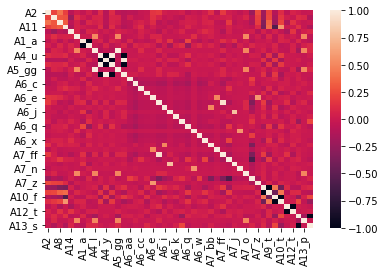

In [ ]:
from seaborn import heatmap
heatmap(data.corr())
data.corr()

**Klasyfikator Naiwny Bayesa**
- Obie reprezentacje są dopuszczalne
- Najlepiej radzi sobie z danymi kategorycznymi.
- Najlepiej działa z danymi niezależnymi od siebie (jak można zauważyć z heatmapy powyżej, dane w zdecydowanej większości są od siebie mało zależne).
- gdy cecha ma dużą ilość wartości kategorycznych to warto zastosować one hot encoding w celu zwiększenia dokładności klasyfikacji, ale w przypadku małej liczby wartości nie powinien mieć dużego wpływu na dokładność

**Klas. k-NN**
- Obie reprezentacje są dopuszczalne
- Warto zastosować one hot encoding w celu polepszenia wyników klasyfikacji, ale może zwiększyć czas obliczeń

**Klas. SVM**
- Obie reprezentacje są dopuszczalne
- Dzięki zastosowaniu One hot encodingu można zwiększyć dokładność predykcji, ale w niektóych przypadkach może prowadzić do overfittingu. Zwiększa to też czas obliczeń. W wielu przypadkach lepiej zastosować inny sposób kodowania (Ordinal encoding - inne wartości oprócz 0 i 1)
- Wybór reprezentacji ma mniejsze znaczenie niż w k-NN

**Lasy losowe**
- Z obiema reprezentacjami radzi sobie dobrze
- Jeżeli dane kategoryczną są od siebie zależne one hot encoding zmniejsza dokładność klasyfikacji


In [ ]:
data["A16"]=(data["A16"]=="+").astype(np.int8)

In [ ]:
data["A16"].sum()

300

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop(inplace=False, columns=["A16"])
y = data["A16"]
x.head()

folds = KFold(n_splits=5, random_state=0, shuffle=True)
# x_train, x_test, y_train, y_test = train_test_split(
# x, y, test_size=0.25, random_state=0, shuffle=True
# )
# x_train = x_train.values.reshape(-1, 1)
# x_test = x_test.values.reshape(-1, 1)

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [ ]:
from sklearn.model_selection import KFold



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

data_columns = data.columns
scaler = MinMaxScaler()
train_data = DataFrame(scaler.fit_transform(data))
train_data.columns = data_columns
train_data.head()

ValueError: ignored